## Linear Regression ##
Richard Sowers 2018-05-16
Pavle Coric 2018-05-17

Copyright 2018 University of Illinois Board of Trustees. All Rights Reserved. Licensed under the MIT license

In [46]:
import numpy
%matplotlib inline
#%matplotlib notebook
import matplotlib.pyplot as plt
import tensorflow as tf

In [47]:
numpy.random.seed(0)
#tf.set_random_seed(0)
N=100
err_scale=0.1
M=2
B=3

In [48]:
xvals=numpy.random.normal(size=N)
yvals=M*xvals+B+numpy.random.normal(scale=err_scale,size=N)
data=[(x,y) for (x,y) in zip(xvals,yvals)]
print(data[:10])

[(1.764052345967664, 6.716419761640953), (0.4001572083672233, 3.665538510620202), (0.9787379841057392, 4.830427468362905), (2.240893199201458, 7.578726069218717), (1.8675579901499675, 6.617803639788519), (-0.977277879876411, 1.2398063588121073), (0.9500884175255894, 4.858814936975204), (-0.1513572082976979, 2.6225401022605284), (-0.10321885179355784, 2.9858564990609224), (0.41059850193837233, 3.9692484830201873)]


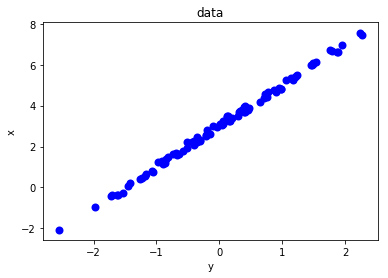

In [49]:
plt.figure()
plt.scatter(xvals,yvals,color="blue",linewidth=2)
plt.ylabel("x")
plt.xlabel("y")
plt.title("data")
plt.show()
plt.close()

In [50]:
#Create placeholders for TensorFlow X and Y
X = tf.placeholder(tf.float32, name="X") 
Y = tf.placeholder(tf.float32, name="Y")

In [51]:
#Create slope and bias
# Step 3: create weight and bias, initialized to 0 
w = tf.Variable(0.0, name="weights") 
b = tf.Variable(0.0, name="bias") 

In [52]:
#Create prediction model
Y_predicted = X * w + b

In [53]:
#Create loss function, used mse
loss = tf.square(Y - Y_predicted, name="loss") 

In [54]:
#Create Optimizer Function
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(loss) 

In [55]:
#Start Session
with tf.Session() as sess: 
    # Step 7: initialize the necessary variables, in this case, w and b 
    sess.run(tf.global_variables_initializer())  
 
    #Train the Model 
    for i in range(N): # run 100 epochs 
        for x, y in data: # Session runs train_op to minimize loss 
            sess.run(optimizer, feed_dict={X: x, Y:y})  
 
    # Step 9: output the values of w and b 
    w_value, b_value = sess.run([w, b]) 

In [56]:
(m,b)= w_value, b_value
print("estimated (m,b)="+str((m,b)))

estimated (m,b)=(2.0190277, 2.9997303)
